In [3]:
import sys
sys.path.append('../')
import numpy as np
from backend.logic import Game
from qiskit.visualization import plot_histogram

## Esquina

In [4]:
my_payoff_table = {'00': "0,0", 
                   '01': "10,5",
                   '10': "5,10",
                   '11': "5,5"} 
esquina = Game('custom', num_players=2, protocol="EWL", payoff_table=my_payoff_table)
esquina.display_payoffs()

Game: custom
Payoffs: 


,outcome,payoffs
0,00,"(0, 0)"
1,01,"(10, 5)"
2,10,"(5, 10)"
3,11,"(5, 5)"


In [55]:
#P1_strategy = ['Rx(0)', 'Ry(0)', 'Rz(0)']
#P2_strategy = ['Rx(0)', 'Ry(0)', 'Rz(0)']
P1_strategy = 'Rx(pi)'
P2_strategy = 'Rz(pi/2)'
combined_strategies = [P1_strategy, P2_strategy]
outcomes, results = esquina.play_game(combined_strategies, n_times=100)
esquina.show_results()

Executing circuit ....
Circuit running ...
Circuit finished running, getting counts ...


,Outcome,Payoffs,Winners,num_times
0,10,"[5, 10]",Player 2,44
1,01,"[10, 5]",Player 1,56


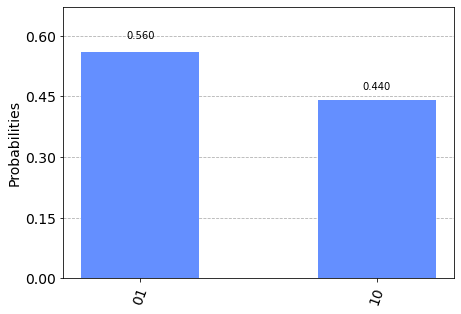

In [56]:
plot_histogram(outcomes)

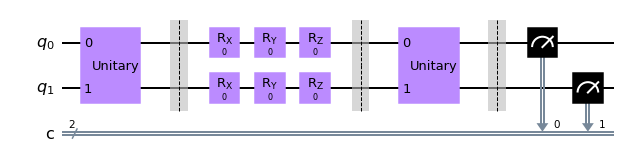

In [24]:
esquina._quantum_game.circ.draw(output='mpl')

## Minority Game

In [12]:
minority_game = Game('minority', num_players = 4, protocol="EWL")
minority_game.set_protocol("EWL", backend = 'simulator')
minority_game.display_payoffs()

Game: minority
Payoffs: 


,outcome,payoffs
0,0000,"(0.0, 0.0, 0.0, 0.0)"
1,0001,"(0.0, 0.0, 0.0, 1.0)"
2,0010,"(0.0, 0.0, 1.0, 0.0)"
3,0011,"(0.0, 0.0, 0.0, 0.0)"
4,0100,"(0.0, 1.0, 0.0, 0.0)"
5,0101,"(0.0, 0.0, 0.0, 0.0)"
6,0110,"(0.0, 0.0, 0.0, 0.0)"
7,0111,"(1.0, 0.0, 0.0, 0.0)"
8,1000,"(1.0, 0.0, 0.0, 0.0)"
9,1001,"(0.0, 0.0, 0.0, 0.0)"


In [13]:
P1_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
P2_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
P3_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
P4_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
combined_strategies = [P1_strategy, P2_strategy, P3_strategy, P4_strategy]

In [14]:
outcomes, results = minority_game.play_game(combined_strategies, n_times=1000)

Executing circuit ....
Circuit running ...
Circuit finished running, getting counts ...


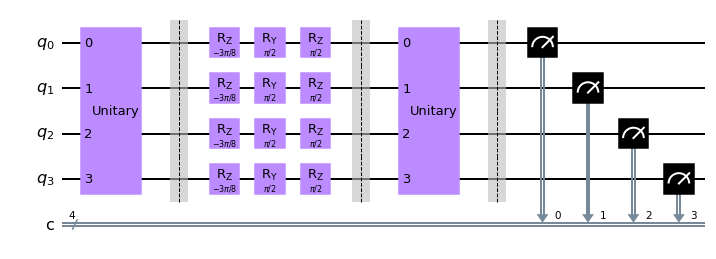

In [15]:
minority_game._quantum_game.draw_circuit()

In [16]:
minority_game.show_results()

,Outcome,Payoffs,Winners,num_times
0,1000,"[1.0, 0.0, 0.0, 0.0]",Player 1,132
1,0100,"[0.0, 1.0, 0.0, 0.0]",Player 2,145
2,0010,"[0.0, 0.0, 1.0, 0.0]",Player 3,133
3,1110,"[0.0, 0.0, 0.0, 1.0]",Player 4,110
4,0001,"[0.0, 0.0, 0.0, 1.0]",Player 4,98
5,1101,"[0.0, 0.0, 1.0, 0.0]",Player 3,128
6,1011,"[0.0, 1.0, 0.0, 0.0]",Player 2,125
7,0111,"[1.0, 0.0, 0.0, 0.0]",Player 1,129


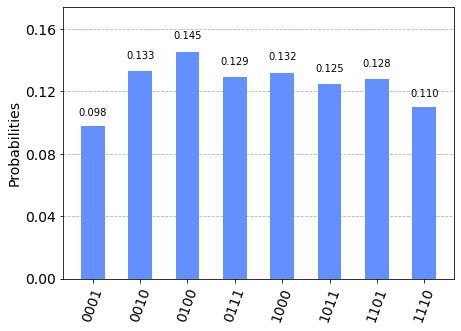

In [17]:
plot_histogram(outcomes)